In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import pandas_profiling
import rpy2
import rpy2.rinterface
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import rcParams
import matplotlib as mpl

In [ ]:
#Read in the data from the file
df = pd.read_csv('C:/githubrepo/7331_Project/data/EmpComp_Cleaned.csv')
df_clean = df
print("Finished Loading Data.")

### PCA and Scree Plot
Below is the Scree plot for the PCA analysis. This seems to show that data reduction is applicable for this problem considering that about 85% of the variance is explained by the first principal component.

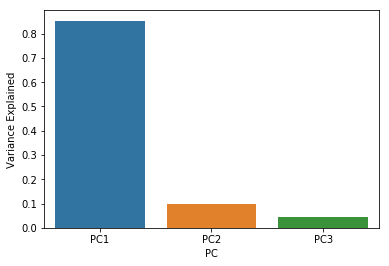

In [38]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits']

# Separating out the features
x = df_clean.loc[:, features].values
# Separating out the target
y = df_clean.loc[:,['Total Salary']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

#Creating the dataframe for the scree plot
df_clean_scree = pd.DataFrame( {'Variance Explained':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3']} )
sns.barplot(x = 'PC', y = "Variance Explained", data = df_clean_scree)

##### Variance explained for each of the principal components

In [39]:
df_clean_scree

,Variance Explained,PC
0,0.853410,PC1
1,0.100129,PC2
2,0.046461,PC3
